<a href="https://colab.research.google.com/github/redrum88/tensorflow/blob/main/03_introduction_to_computer_vision_with_tensor_flow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patters in visual data. Such as camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with smaller dataset so we can experiment quickly  and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:

# import requests 
# file_url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
    
# r = requests.get(file_url, stream = True) 
  
# with open("/content/drive/MyDrive/food101/file.zip", "wb") as file: 
#     for block in r.iter_content(chunk_size = 1024):
#          if block: 
#              file.write(block) 

In [ ]:
!unzip /content/drive/MyDrive/food101/file.zip

Archive:  /content/drive/MyDrive/food101/file.zip
   creating: pizza_steak/
   creating: pizza_steak/test/
   creating: pizza_steak/train/
   creating: pizza_steak/test/steak/
   creating: pizza_steak/test/pizza/
   creating: pizza_steak/train/steak/
   creating: pizza_steak/train/pizza/
  inflating: pizza_steak/test/steak/413497.jpg  
  inflating: pizza_steak/test/steak/2246332.jpg  
  inflating: pizza_steak/test/steak/2649745.jpg  
  inflating: pizza_steak/test/steak/2382600.jpg  
  inflating: pizza_steak/test/steak/296375.jpg  
  inflating: pizza_steak/test/steak/2484823.jpg  
  inflating: pizza_steak/test/steak/400951.jpg  
  inflating: pizza_steak/test/steak/285269.jpg  
  inflating: pizza_steak/test/steak/2475366.jpg  
  inflating: pizza_steak/test/steak/1982192.jpg  
  inflating: pizza_steak/test/steak/2071320.jpg  
  inflating: pizza_steak/test/steak/2353677.jpg  
  inflating: pizza_steak/test/steak/2921355.jpg  
  inflating: pizza_steak/test/steak/3297938.jpg  
  inflating: pi

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this is usually many samples of your data.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/pizza/

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [2]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

FileNotFoundError: ignored

To visualize our images, first let's get the class names programmatically

In [3]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names
print(class_names)

[]


In [4]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

FileNotFoundError: ignored

In [ ]:
import tensorflow as tf
tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 34,  22,   8],
        [ 27,  15,   1],
        [ 28,  16,   2],
        ...,
        [214, 213, 208],
        [255, 255, 248],
        [253, 253, 245]],

       [[ 33,  21,   7],
        [ 26,  14,   0],
        [ 23,  11,   0],
        ...,
        [207, 206, 201],
        [251, 250, 245],
        [250, 250, 242]],

       [[ 37,  25,  11],
        [ 33,  21,   7],
        [ 30,  18,   4],
        ...,
        [192, 191, 187],
        [248, 247, 242],
        [255, 255, 250]],

       ...,

       [[  5,   6,   1],
        [  5,   6,   1],
        [  6,   7,   2],
        ...,
        [ 25,  15,  14],
        [ 25,  15,  14],
        [ 25,  15,  14]],

       [[  6,   7,   2],
        [  5,   6,   1],
        [  6,   7,   2],
        ...,
        [ 23,  13,  12],
        [ 25,  15,  14],
        [ 26,  16,  15]],

       [[  4,   5,   0],
        [  4,   5,   0],
        [  4,   5,   0],
        ...,
        [ 18,   8,   

In [ ]:
img.shape # width, height, colour channels

(512, 512, 3)

🔑 **Note**: As we've discussed before, many machone learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also reffered to as normalize) theyr pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.13333333, 0.08627451, 0.03137255],
        [0.10588235, 0.05882353, 0.00392157],
        [0.10980392, 0.0627451 , 0.00784314],
        ...,
        [0.83921569, 0.83529412, 0.81568627],
        [1.        , 1.        , 0.97254902],
        [0.99215686, 0.99215686, 0.96078431]],

       [[0.12941176, 0.08235294, 0.02745098],
        [0.10196078, 0.05490196, 0.        ],
        [0.09019608, 0.04313725, 0.        ],
        ...,
        [0.81176471, 0.80784314, 0.78823529],
        [0.98431373, 0.98039216, 0.96078431],
        [0.98039216, 0.98039216, 0.94901961]],

       [[0.14509804, 0.09803922, 0.04313725],
        [0.12941176, 0.08235294, 0.02745098],
        [0.11764706, 0.07058824, 0.01568627],
        ...,
        [0.75294118, 0.74901961, 0.73333333],
        [0.97254902, 0.96862745, 0.94901961],
        [1.        , 1.        , 0.98039216]],

       ...,

       [[0.01960784, 0.02352941, 0.00392157],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0

## An end-to-end example

Let's build a convolutional neural network to find patters in our images, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 209ms/step - loss: 0.5453 - accuracy: 0.7187 - val_loss: 0.4222 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4340 - accuracy: 0.8100 - val_loss: 0.3503 - val_accuracy: 0.8680
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.3830 - accuracy: 0.8360 - val_loss: 0.3127 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3412 - accuracy: 0.8527 - val_loss: 0.2806 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.3193 - accuracy: 0.8653 - val_loss: 0.3035 - val_accuracy: 0.8620


🔑**Note:** If the above cell is taking longer than 10 seconds per epochs, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cell above)

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

⚒️**Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground 
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 172ms/step - loss: 1.0730 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 165ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly.. let's try tune model_2

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 4.2957 - accuracy: 0.6027 - val_loss: 0.8794 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 8s 168ms/step - loss: 2.2062 - accuracy: 0.6433 - val_loss: 2.7506 - val_accuracy: 0.5760
Epoch 3/5
47/47 [==============================] - 8s 167ms/step - loss: 1.0276 - accuracy: 0.7287 - val_loss: 0.5457 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 8s 167ms/step - loss: 0.6253 - accuracy: 0.7473 - val_loss: 0.6527 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.4664 - accuracy: 0.8027 - val_loss: 0.4348 - val_accuracy: 0.8040


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patters, **convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with th data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaliling/normalizing)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (344, 512, 3)
Image shape: (512, 287, 3)


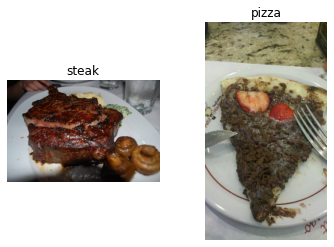

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")


### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of the processor (GPU).
2. Trying to learn the patters in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32??

Because 32 is good for your health...

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # Type of data you're working with
                                               batch_size=32) # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

🔑**Note:** In deep learning, there is almost an infinity amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your probleblem).

In [5]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


⚒️**Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [ ]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 1.4693 - accuracy: 0.6493 - val_loss: 0.4613 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4673 - accuracy: 0.7940 - val_loss: 0.4051 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 181ms/step - loss: 0.3534 - accuracy: 0.8647 - val_loss: 0.3612 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.2070 - accuracy: 0.9280 - val_loss: 0.4512 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 9s 181ms/step - loss: 0.0945 - accuracy: 0.9673 - val_loss: 0.5209 - val_accuracy: 0.8020


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 129ms/step - loss: 0.3035 - accuracy: 0.8620


[0.30349525809288025, 0.8619999885559082]

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.5209 - accuracy: 0.8020


[0.520908772945404, 0.8019999861717224]

### 5. Evaluating our mode

It's looks like our model is learning something, let's evaluate it.


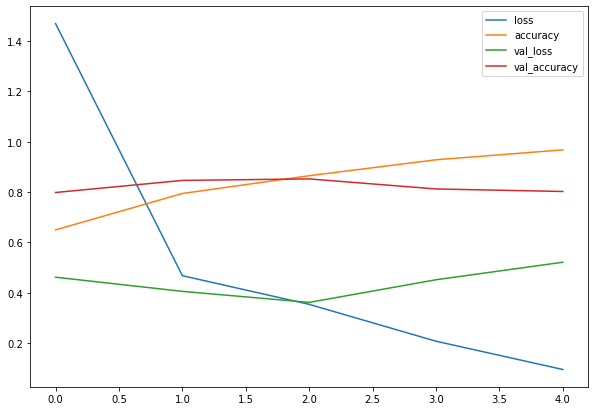

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [6]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

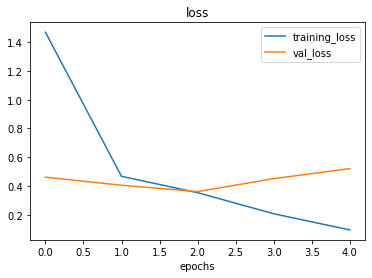

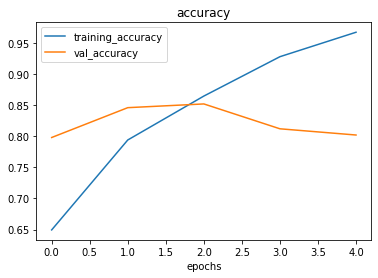

In [ ]:
# Check out the loss and accuracy  of model_4
plot_loss_curves(history_4)

>🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset _too well_ and thus the model's ability to generalize to unseen data will be diminished.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also know as **regularization**.


In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.6563 - accuracy: 0.6080 - val_loss: 0.5165 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4940 - accuracy: 0.7720 - val_loss: 0.4134 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4649 - accuracy: 0.7893 - val_loss: 0.4235 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4315 - accuracy: 0.8133 - val_loss: 0.3702 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.4158 - accuracy: 0.8153 - val_loss: 0.3826 - val_accuracy: 0.8460


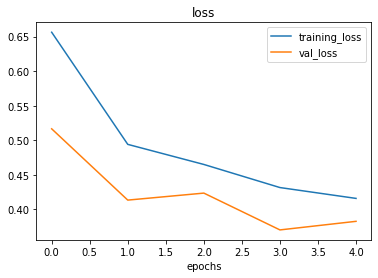

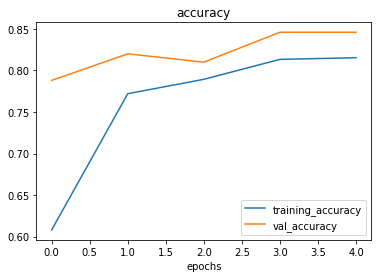

In [ ]:
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # do you wanna flip an image?

# Create ImageDataGenrator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our odels to learn more generalizable (hopefully) patters. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something else.

Let's write some code to visualize data augmentation..

In [ ]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False) # For demonstration purpose only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented testing data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)



Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented testing data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [ ]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data (images)


Showing image number: 4


(-0.5, 223.5, 223.5, -0.5)

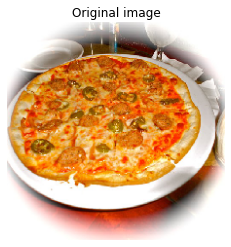

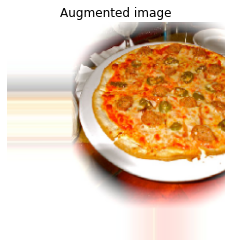

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # our batch size are 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns

In [ ]:

# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 457ms/step - loss: 0.7399 - accuracy: 0.4507 - val_loss: 0.6869 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 21s 437ms/step - loss: 0.6902 - accuracy: 0.5620 - val_loss: 0.6632 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 22s 465ms/step - loss: 0.7053 - accuracy: 0.5793 - val_loss: 0.6492 - val_accuracy: 0.5200
Epoch 4/5
47/47 [==============================] - 20s 436ms/step - loss: 0.6686 - accuracy: 0.5887 - val_loss: 0.8490 - val_accuracy: 0.5140
Epoch 5/5
47/47 [==============================] - 21s 437ms/step - loss: 0.7065 - accuracy: 0.5527 - val_loss: 0.6683 - val_accuracy: 0.5500


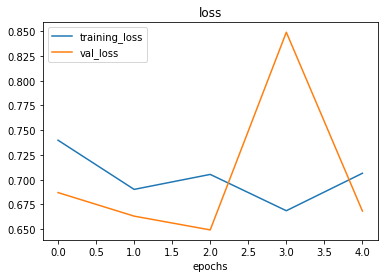

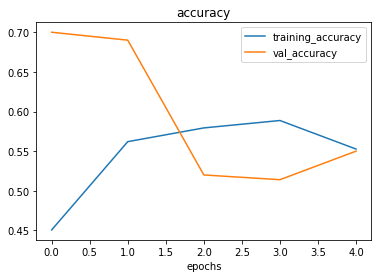

In [ ]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (same as before) on it and see what's happens.

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_6 and model_5)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 453ms/step - loss: 0.6361 - accuracy: 0.6453 - val_loss: 0.4574 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 22s 466ms/step - loss: 0.5320 - accuracy: 0.7320 - val_loss: 0.5757 - val_accuracy: 0.6760
Epoch 3/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4994 - accuracy: 0.7647 - val_loss: 0.3696 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4962 - accuracy: 0.7653 - val_loss: 0.3460 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 20s 436ms/step - loss: 0.4675 - accuracy: 0.7867 - val_loss: 0.3776 - val_accuracy: 0.8340


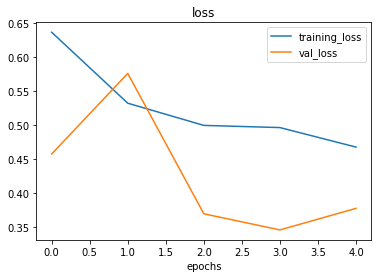

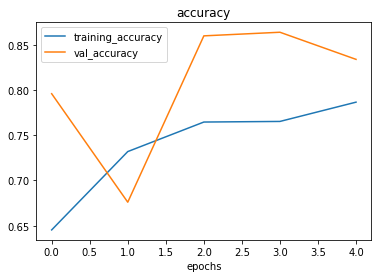

In [ ]:
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfy

Since we're already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers) ✅
* Increase the number of filter in each convolutional layer(e.g. from 10 to 32 or even 64) ✅
* Train for longer (more epochs) ✅
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> ⚒️ **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data. ✅

In [ ]:
# Create practice model_8 same as model_1 with augmented and shuffled data
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 22s 456ms/step - loss: 0.6417 - accuracy: 0.6193 - val_loss: 0.5076 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5596 - accuracy: 0.7167 - val_loss: 0.6210 - val_accuracy: 0.6820
Epoch 3/5
47/47 [==============================] - 22s 479ms/step - loss: 0.5778 - accuracy: 0.6927 - val_loss: 0.4233 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 21s 447ms/step - loss: 0.5193 - accuracy: 0.7400 - val_loss: 0.3669 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4836 - accuracy: 0.7687 - val_loss: 0.3427 - val_accuracy: 0.8420


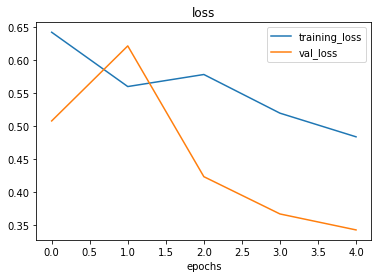

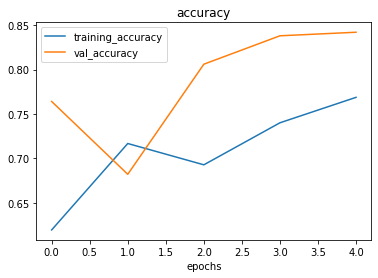

In [ ]:
plot_loss_curves(history_8)

In [ ]:
# Create model_9 same as above with increased filters from 10 to 32
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.Conv2D(32,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 29s 558ms/step - loss: 0.6590 - accuracy: 0.6320 - val_loss: 0.6031 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 22s 460ms/step - loss: 0.5619 - accuracy: 0.7100 - val_loss: 0.4376 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 22s 463ms/step - loss: 0.5303 - accuracy: 0.7420 - val_loss: 0.3708 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 23s 492ms/step - loss: 0.4952 - accuracy: 0.7607 - val_loss: 0.3357 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4871 - accuracy: 0.7673 - val_loss: 0.3652 - val_accuracy: 0.8600


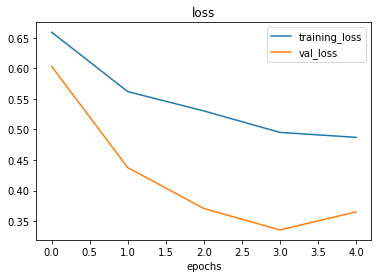

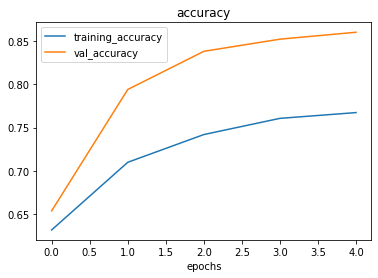

In [ ]:
plot_loss_curves(history_9)

In [ ]:
# Create model_10 same as above with one more convolution layer
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.Conv2D(32,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(32,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6222 - accuracy: 0.6440 - val_loss: 0.4564 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 22s 461ms/step - loss: 0.5502 - accuracy: 0.7180 - val_loss: 0.3970 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 23s 488ms/step - loss: 0.5395 - accuracy: 0.7280 - val_loss: 0.3954 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5039 - accuracy: 0.7587 - val_loss: 0.4748 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4824 - accuracy: 0.7767 - val_loss: 0.3414 - val_accuracy: 0.8780


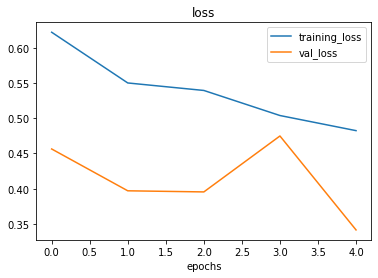

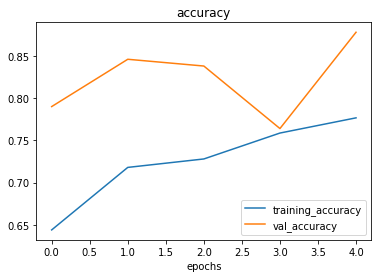

In [ ]:
plot_loss_curves(history_10)

In [ ]:
# Create model_11 same as model_9 and train for 15 epochs
model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.Conv2D(32,3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_11.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented_shuffled,
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/15
47/47 [==============================] - 24s 510ms/step - loss: 0.6743 - accuracy: 0.6153 - val_loss: 0.5104 - val_accuracy: 0.7760
Epoch 2/15
47/47 [==============================] - 23s 489ms/step - loss: 0.5857 - accuracy: 0.6747 - val_loss: 0.4352 - val_accuracy: 0.8340
Epoch 3/15
47/47 [==============================] - 22s 462ms/step - loss: 0.5540 - accuracy: 0.7240 - val_loss: 0.4198 - val_accuracy: 0.8240
Epoch 4/15
47/47 [==============================] - 22s 461ms/step - loss: 0.5380 - accuracy: 0.7380 - val_loss: 0.4017 - val_accuracy: 0.8460
Epoch 5/15
47/47 [==============================] - 22s 463ms/step - loss: 0.4929 - accuracy: 0.7627 - val_loss: 0.3738 - val_accuracy: 0.8420
Epoch 6/15
47/47 [==============================] - 23s 491ms/step - loss: 0.4879 - accuracy: 0.7633 - val_loss: 0.3397 - val_accuracy: 0.8720
Epoch 7/15
47/47 [==============================] - 22s 462ms/step - loss: 0.4788 - accuracy: 0.7780 - val_loss: 0.4379 - val_accuracy: 0.8200

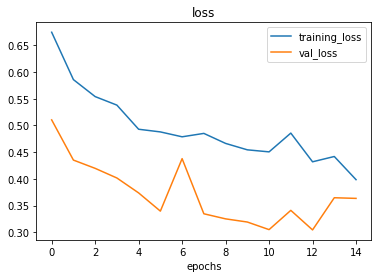

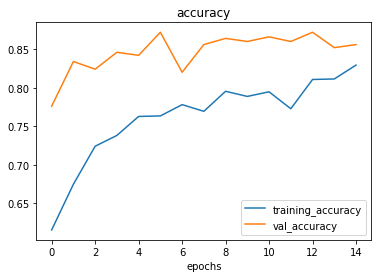

In [ ]:
plot_loss_curves(history_11)

## Making a prediction with our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [ ]:
steak = mpimg.imread("maxresdefault.jpg")

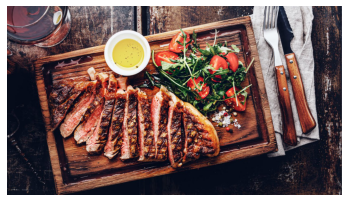

In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(720, 1280, 3)

In [ ]:
steak

array([[[ 93,  46,  56],
        [ 93,  46,  56],
        [ 93,  46,  56],
        ...,
        [ 42,  45,  60],
        [ 22,  25,  40],
        [109, 112, 127]],

       [[ 92,  45,  55],
        [ 92,  45,  55],
        [ 92,  45,  55],
        ...,
        [ 35,  38,  53],
        [ 22,  25,  40],
        [108, 111, 126]],

       [[ 92,  45,  55],
        [ 92,  45,  55],
        [ 92,  45,  55],
        ...,
        [ 22,  25,  40],
        [ 19,  22,  37],
        [118, 121, 136]],

       ...,

       [[ 12,  18,  30],
        [ 12,  18,  30],
        [ 12,  18,  30],
        ...,
        [ 24,  12,  22],
        [ 14,   4,  12],
        [107,  97, 105]],

       [[ 12,  18,  30],
        [ 12,  18,  30],
        [ 12,  18,  30],
        ...,
        [ 41,  28,  35],
        [ 35,  24,  30],
        [130, 119, 125]],

       [[ 12,  18,  30],
        [ 12,  18,  30],
        [ 12,  18,  30],
        ...,
        [ 42,  30,  34],
        [ 35,  24,  28],
        [128, 117, 121]]

🔑 **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained.

In [7]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads and image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("maxresdefault.jpg")

In [ ]:
steak.shape

TensorShape([224, 224, 3])

In [ ]:
model_11.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 213ms/step


array([[0.9999999]], dtype=float32)

In [ ]:
pica = load_and_prep_image("pica1.jpg")

In [ ]:
pred = model_11.predict(tf.expand_dims(pica, axis=0))

1/1 [==============================] - 0s 68ms/step


Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability  and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]

In [ ]:
pred_class

'pizza'

In [8]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 45ms/step


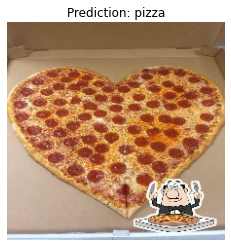

In [ ]:
# Test our model on a custom image
pred_and_plot(model_11, "pica.jpg")

Our model works! Let's try on another image... this time steak

1/1 [==============================] - 0s 23ms/step


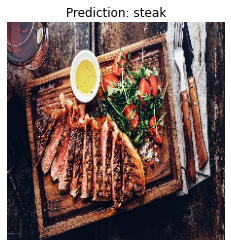

In [ ]:
pred_and_plot(model_11, "maxresdefault.jpg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [9]:
URL = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-21 00:25:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   172MB/s    in 2.9s    

2023-01-21 00:25:44 (172 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
import os

# Walk throug 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 

In [11]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jan 21 00:25 .
drwxr-xr-x  1 root root 4096 Jan 21 00:25 ..
drwxr-xr-x 12 root root 4096 Jan 21 00:25 test
drwxr-xr-x 12 root root 4096 Jan 21 00:25 train


In [12]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [13]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


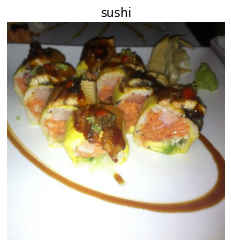

In [14]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)


In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about cnn explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Activation
from tensorflow.keras.layers import Flatten

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_12 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
history_12 = model_12.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 562s 2s/step - loss: 2.1089 - accuracy: 0.2352 - val_loss: 1.9832 - val_accuracy: 0.2916
Epoch 2/5
235/235 [==============================] - 558s 2s/step - loss: 1.8942 - accuracy: 0.3468 - val_loss: 1.9185 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 565s 2s/step - loss: 1.6208 - accuracy: 0.4519 - val_loss: 1.9192 - val_accuracy: 0.3392
Epoch 4/5
235/235 [==============================] - 564s 2s/step - loss: 1.0543 - accuracy: 0.6553 - val_loss: 2.3184 - val_accuracy: 0.3096
Epoch 5/5
235/235 [==============================] - 565s 2s/step - loss: 0.4626 - accuracy: 0.8547 - val_loss: 3.2426 - val_accuracy: 0.2948


### 5. Evaluate the model

In [38]:
# Evaluate on the test data
model_12.evaluate(test_data)

79/79 [==============================] - 57s 725ms/step - loss: 3.2426 - accuracy: 0.2948


[3.242591381072998, 0.2948000133037567]

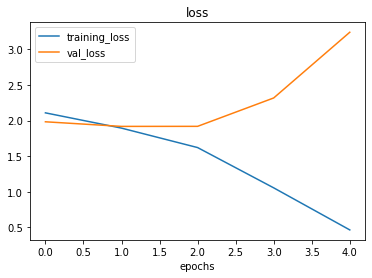

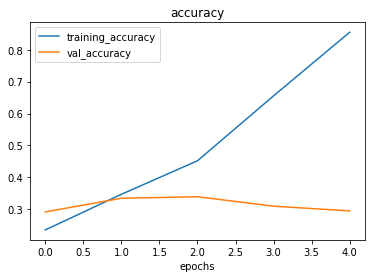

In [39]:
# Check out the model's loss curves on the 10 classes.
plot_loss_curves(history_12)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to it's performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patters...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: # of layers or reduce # hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patters another model has learned on similar dat to your own and allows you to use those patters on your own dataset

In [40]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers
model_12.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_4 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

In [41]:
# Create our model (same as model_12 just removed 2 convolutional layers)
model_13 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_13 = model_13.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 280s 1s/step - loss: 2.1061 - accuracy: 0.2419 - val_loss: 1.9781 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 260s 1s/step - loss: 1.7082 - accuracy: 0.4275 - val_loss: 1.9746 - val_accuracy: 0.3004
Epoch 3/5
235/235 [==============================] - 260s 1s/step - loss: 1.1626 - accuracy: 0.6308 - val_loss: 2.0946 - val_accuracy: 0.3016
Epoch 4/5
235/235 [==============================] - 267s 1s/step - loss: 0.6514 - accuracy: 0.8080 - val_loss: 2.5689 - val_accuracy: 0.2956
Epoch 5/5
235/235 [==============================] - 261s 1s/step - loss: 0.2919 - accuracy: 0.9275 - val_loss: 3.1883 - val_accuracy: 0.2884


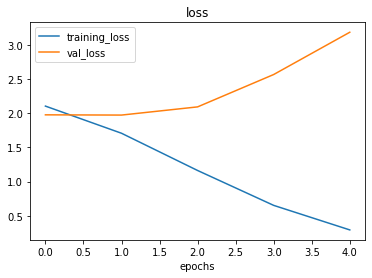

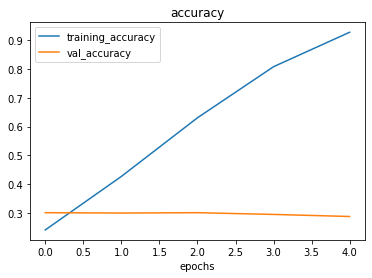

In [42]:
#Check the loss curves model_13
plot_loss_curves(history_13)

In [43]:
model_13.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 29160)            

Looks like our "simplifiying the mode" experiment didn't work.. the accuracy went down and overfitting continued..

How about we try data augmentation??

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the rain and validation loss curves closer)
* Improve validation accuracy

In [16]:
# Create an augmented data generator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.3, # move your image around on the y-axis
                                             horizontal_flip=True) # do you wanna flip an image?

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True) # For demonstration purpose only

Found 7500 images belonging to 10 classes.


In [48]:
# Let's create another mode but this time we'll fit it on the augmented training data
model_14 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 641s 3s/step - loss: 2.3018 - accuracy: 0.1148 - val_loss: 2.2638 - val_accuracy: 0.1348
Epoch 2/5
235/235 [==============================] - 636s 3s/step - loss: 2.2785 - accuracy: 0.1468 - val_loss: 2.2376 - val_accuracy: 0.1808
Epoch 3/5
235/235 [==============================] - 642s 3s/step - loss: 2.2622 - accuracy: 0.1633 - val_loss: 2.1987 - val_accuracy: 0.1952
Epoch 4/5
235/235 [==============================] - 639s 3s/step - loss: 2.1909 - accuracy: 0.1971 - val_loss: 2.0707 - val_accuracy: 0.2608
Epoch 5/5
235/235 [==============================] - 639s 3s/step - loss: 2.1084 - accuracy: 0.2449 - val_loss: 1.9761 - val_accuracy: 0.3184


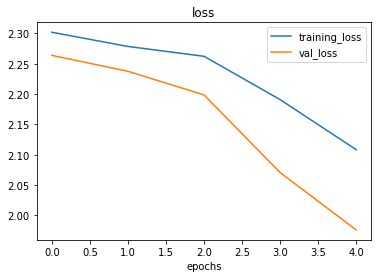

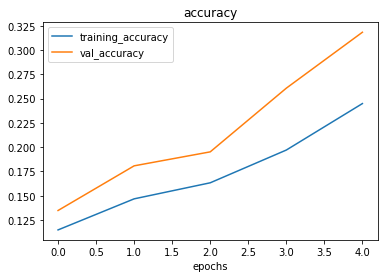

In [49]:
plot_loss_curves(history_14)

In [50]:
model_14.evaluate(test_data)

79/79 [==============================] - 69s 862ms/step - loss: 1.9761 - accuracy: 0.3184


[1.9760907888412476, 0.31839999556541443]

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not wroong direction) so if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied

We could keep going here... continually trying bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (incrasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs).
- try **transfer learning**

In [19]:
# Let's create another mode but this time we'll fit it on the augmented training data
model_15 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_15.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_15 = model_15.fit(train_data_augmented,
                          epochs=1,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

235/235 [==============================] - 646s 3s/step - loss: 2.2760 - accuracy: 0.1380 - val_loss: 2.1942 - val_accuracy: 0.1812


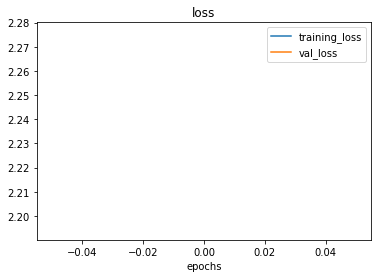

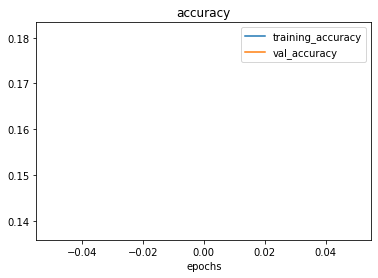

In [20]:
plot_loss_curves(history_15)

## Make a prediction with our trained model

Let's use our trained model to make some predictions on our own images!

In [21]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [25]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 62ms/step


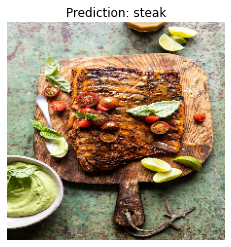

In [27]:
# Make a prediction using model_15
pred_and_plot(model_15,
              filename="sal.jpg",
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achivied around 20 percent accuracy on the test data. So we can expect it to function quit poorly on unseen data.

## Saving and loading model

In [29]:
# Save a model
model_15.save("saved_trained_model_15")

In [30]:
# Load in a trained model and evaluate it
loaded_model_15 = tf.keras.models.load_model("saved_trained_model_15")

In [31]:
loaded_model_15.evaluate(test_data)

79/79 [==============================] - 67s 844ms/step - loss: 2.1942 - accuracy: 0.1812


[2.1942403316497803, 0.18119999766349792]

In [32]:
model_15.evaluate(test_data)

79/79 [==============================] - 60s 755ms/step - loss: 2.1942 - accuracy: 0.1812


[2.1942403316497803, 0.18119999766349792]